In [1]:
# pip install tensorflow numpy matplotlib opencv-python scikit-learn
# installing all the libraries i might use 
#importing the libraries 
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image


In [2]:
#loading the data 
DATA_DIR = r'C:\Users\91947\Desktop\dataset\OS_Collected_Data'

classes = os.listdir(DATA_DIR)
print("Classes found:", classes)

Classes found: ['Normal', 'Osteopenia', 'Osteoporosis']


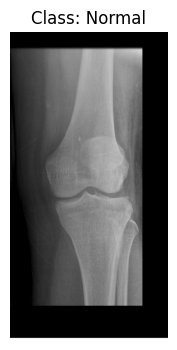

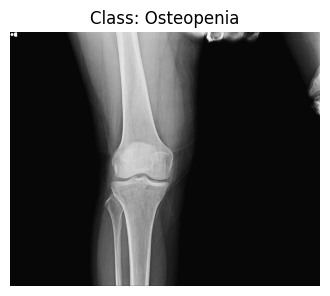

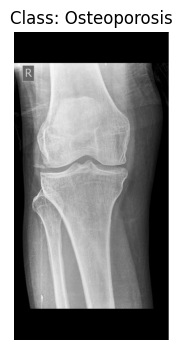

In [3]:
#visualizing the image
import matplotlib.pyplot as plt
import cv2

for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    image_files = os.listdir(cls_path)
    if image_files:
        img_path = os.path.join(cls_path, image_files[0])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"Class: {cls}")
        plt.axis('off')
        plt.show()


In [4]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Set your dataset directory
DATA_DIR = r'C:\Users\91947\Desktop\dataset\OS_Collected_Data'

# Define target image size and batch size
img_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator instance with data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    rotation_range=20,         # Random rotations in degrees
    width_shift_range=0.2,     # Random horizontal shifts
    height_shift_range=0.2,    # Random vertical shifts
    shear_range=0.2,           # Shear transformations
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flips
    validation_split=0.2       # Reserve 20% of data for validation
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Optionally, print class indices to verify
print("Class indices:", train_generator.class_indices)

# ---------------------------
# Now, Build Your Model
# ---------------------------

# 1. Load the pre-trained ResNet50 model without the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. Build the custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
# Apply Dropout with a specified seed (this line now works because x is defined)
x = Dropout(0.5, seed=42)(x)

# 3. Determine the number of classes from your data generator and add the final Dense layer
num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

# 4. Combine the base model and the new top layers into a final model
model = Model(inputs=base_model.input, outputs=predictions)

# Now you can continue with compiling and training your model...



Found 1559 images belonging to 3 classes.
Found 388 images belonging to 3 classes.
Class indices: {'Normal': 0, 'Osteopenia': 1, 'Osteoporosis': 2}


Found 1559 images belonging to 3 classes.
Found 388 images belonging to 3 classes.
Class indices: {'Normal': 0, 'Osteopenia': 1, 'Osteoporosis': 2}
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 589s 12s/step - accuracy: 0.3939 - loss: 1.2648 - val_accuracy: 0.4271 - val_loss: 1.0393
Epoch 2/10
 1/48 ━━━━━━━━━━━━━━━━━━━━ 5:21 7s/step - accuracy: 0.4688 - loss: 1.0672

C:\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


48/48 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.4688 - loss: 1.0672 - val_accuracy: 0.4427 - val_loss: 1.0302
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 401s 8s/step - accuracy: 0.3936 - loss: 1.1431 - val_accuracy: 0.5443 - val_loss: 0.9970
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5625 - loss: 1.0446 - val_accuracy: 0.5182 - val_loss: 1.0042
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 320s 7s/step - accuracy: 0.4194 - loss: 1.1177 - val_accuracy: 0.5599 - val_loss: 0.9969
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4062 - loss: 1.0621 - val_accuracy: 0.5104 - val_loss: 1.0066
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 290s 6s/step - accuracy: 0.4334 - loss: 1.0935 - val_accuracy: 0.5026 - val_loss: 0.9923
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5000 - loss: 1.0188 - val_accuracy: 0.5208 - val_loss: 0.9877
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 297s 6s/step - accuracy: 0.4566 - loss: 1.0513 - val_accuracy: 0.5312 - val_loss: 0.976

Model saved to osteoporosis_detector.h5


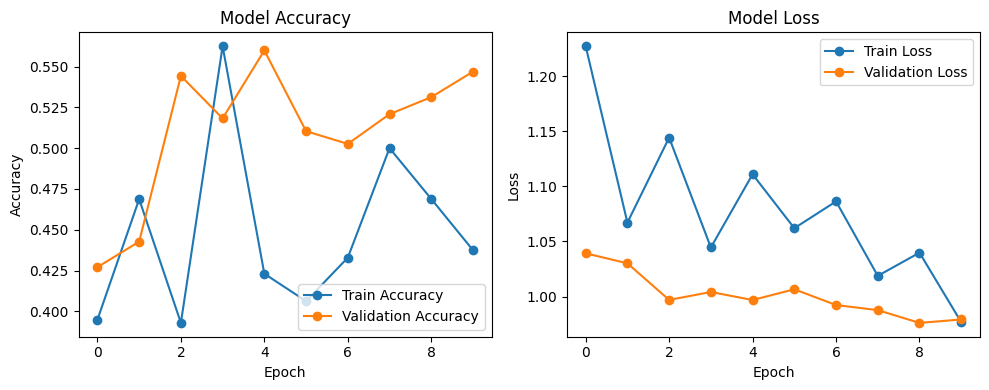

In [16]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ----- Data Generators Setup (Assuming these are already defined) -----
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set your dataset directory
DATA_DIR = r'C:\Users\91947\Desktop\dataset\OS_Collected_Data'

# Define target image size and batch size
img_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator instance with augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    rotation_range=20,         # Random rotations in degrees
    width_shift_range=0.2,     # Random horizontal shifts
    height_shift_range=0.2,    # Random vertical shifts
    shear_range=0.2,           # Shear transformations
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flips
    validation_split=0.2       # Reserve 20% for validation
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Optionally, print class indices to verify
print("Class indices:", train_generator.class_indices)

# ----- Model Building and Training -----
model_path = "osteoporosis_detector.h5"

if os.path.exists(model_path):
    # Load the previously trained model
    model = load_model(model_path)
    print("Loaded saved model from", model_path)
else:
    # Build the model using transfer learning with ResNet50
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Add custom layers on top of the base model for your classification task
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # You can also specify a seed here if needed, e.g., Dropout(0.5, seed=42)
    
    # Determine the number of classes from your data generator
    num_classes = len(train_generator.class_indices)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    # Combine the base model with the new layers
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Freeze the base model layers so that only the new layers are trained initially
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compile the model with an appropriate optimizer and loss function
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Set up EarlyStopping callback to halt training if validation loss does not improve
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model using the training and validation generators
    history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping],
    )
    
    # Save the trained model to disk for later use
    model.save(model_path)
    print("Model saved to", model_path)

# ----- Visualize Training Status (Only available if the model was trained in this session) -----
# If you just loaded the model, you might not have training history.
if 'history' in locals():
    plt.figure(figsize=(10, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], marker='o', label='Train Loss')
    plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
else:
    print("No training history available since the model was loaded from disk.")
